# Explore here

In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# leer el CSV desde una URL
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv' 
df = pd.read_csv(url)

df.shape

(48895, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
# veamos filas duplicadas
df_duplicatedrows = df[df.duplicated(subset=['neighbourhood','latitude','longitude','room_type','price'], keep=False)]
df_duplicatedrows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12251,9484892,"Cozy, E.Vill room w/ private bath!",13667539,Brian,Manhattan,East Village,40.72145,-73.97881,Private room,75,1,2,2016-01-01,0.05,1,0
37105,29501807,Sunny room with new Queen bed and large closet,77813945,Andrew,Manhattan,East Village,40.72145,-73.97881,Private room,75,4,5,2019-05-26,1.90,1,33
48391,36235150,Sky View beautiful apt in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,1,2019-07-07,1.00,3,340
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365


In [14]:
df_unique = df.drop_duplicates(subset=['neighbourhood','latitude','longitude','room_type','price'])
df_unique

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [15]:
df_filtered = df_unique[['neighbourhood_group', 'neighbourhood', 'room_type','calculated_host_listings_count','price', 'minimum_nights','availability_365']]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48893 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48893 non-null  object
 1   neighbourhood                   48893 non-null  object
 2   room_type                       48893 non-null  object
 3   calculated_host_listings_count  48893 non-null  int64 
 4   price                           48893 non-null  int64 
 5   minimum_nights                  48893 non-null  int64 
 6   availability_365                48893 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 3.0+ MB


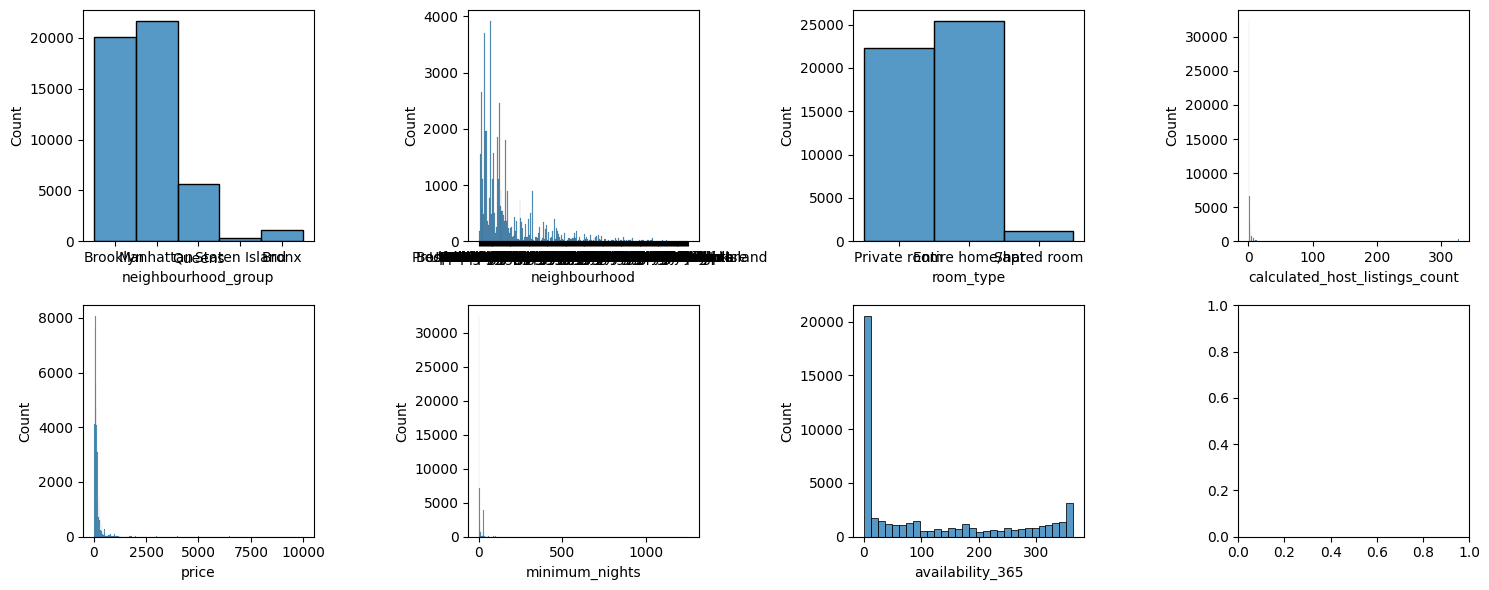

In [ ]:
# histogramas
fig, axes = plt.subplots(2, 4, figsize = (15, 6))

sns.histplot(ax= axes[0,0], data=df_filtered, x='neighbourhood_group')
sns.histplot(ax= axes[0,1], data=df_filtered, x='neighbourhood')
sns.histplot(ax= axes[0,2], data=df_filtered, x='room_type')
sns.histplot(ax= axes[0,3], data=df_filtered, x='calculated_host_listings_count')
sns.histplot(ax= axes[1,0], data=df_filtered, x='price')
sns.histplot(ax= axes[1,1], data=df_filtered, x='minimum_nights')
sns.histplot(ax= axes[1,2], data=df_filtered, x='availability_365')

plt.tight_layout()
plt.show()

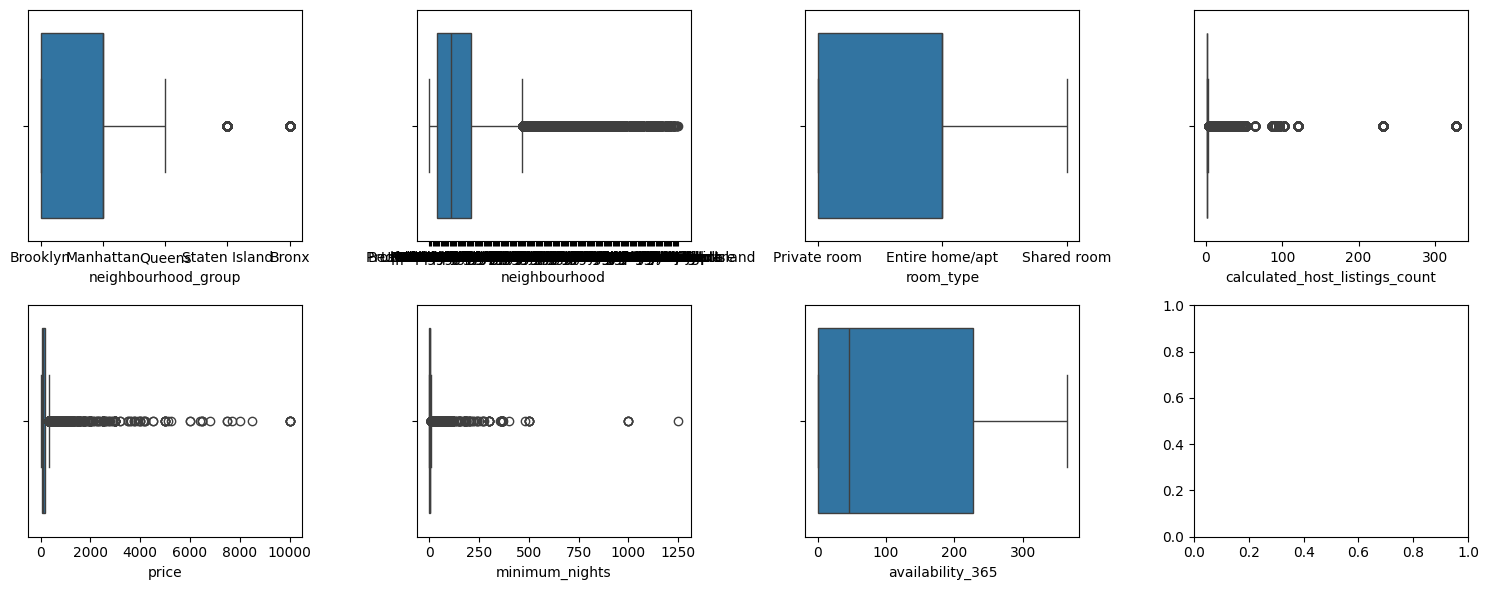

In [28]:
# Boxplots
fig, axes = plt.subplots(2, 4, figsize = (15, 6))
sns.boxplot(ax= axes[0,0], data=df_filtered, x='neighbourhood_group')
sns.boxplot(ax= axes[0,1], data=df_filtered, x='neighbourhood')
sns.boxplot(ax= axes[0,2], data=df_filtered, x='room_type')
sns.boxplot(ax= axes[0,3], data=df_filtered, x='calculated_host_listings_count')
sns.boxplot(ax= axes[1,0], data=df_filtered, x='price')
sns.boxplot(ax= axes[1,1], data=df_filtered, x='minimum_nights')
sns.boxplot(ax= axes[1,2], data=df_filtered, x='availability_365')

plt.tight_layout()
plt.show()

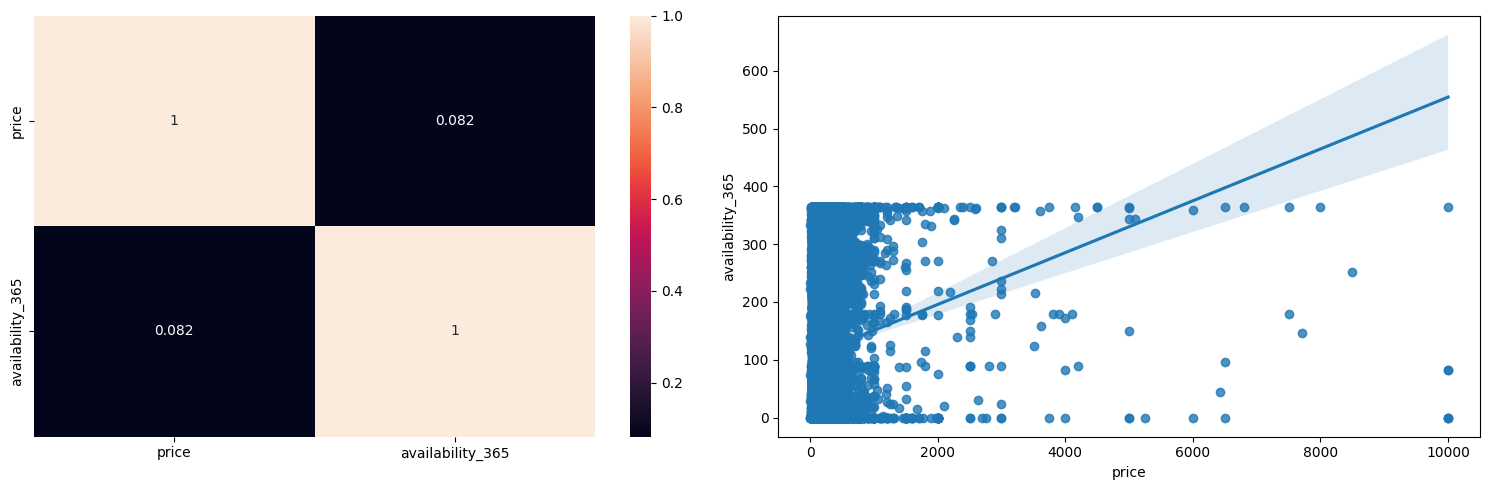

In [29]:
# heatmap y regplot precio vs disponibilidad

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.heatmap(df_filtered[['price','availability_365']].corr(), ax= axes[0], annot=True)
sns.regplot(data=df_filtered, x="price",y="availability_365", ax= axes[1])

plt.tight_layout()
plt.show()

No hay correlación entre precio y disponibilidad.

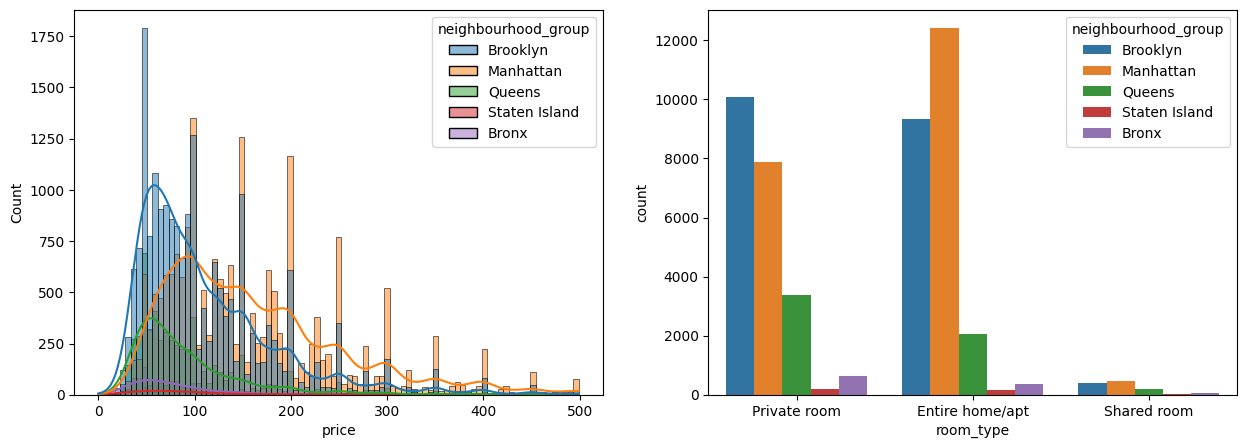

In [30]:
# Precio x vecindario x tipo de habitación

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

precios=df_filtered[df_filtered['price']<500]
sns.histplot(data=precios, x="price",hue="neighbourhood_group",ax= axes[0], kde=True)
sns.countplot(data=precios, x="room_type",hue="neighbourhood_group",ax= axes[1])

plt.show()

#Brooklyn es el que cuenta con mayores opciones economicas
#Manhattan es el que cuenta con mayores opciones, destacando entire home/apt, lo cual puede estar ligando a los precios mas altos

In [31]:
df_group= df_filtered.groupby(by=['room_type', 'neighbourhood_group'])[['price']].median()
df_group

price
room_type       neighbourhood_group       
Entire home/apt Bronx                100.0
                Brooklyn             145.0
                Manhattan            191.0
                Queens               120.0
                Staten Island        100.0
Private room    Bronx                 53.5
                Brooklyn              65.0
                Manhattan             90.0
                Queens                60.0
                Staten Island         50.0
Shared room     Bronx                 40.0
                Brooklyn              36.0
                Manhattan             69.0
                Queens                37.0
                Staten Island         30.0

In [32]:
df_filtered.select_dtypes(include=np.number).corr(method='pearson')

,calculated_host_listings_count,price,minimum_nights,availability_365
calculated_host_listings_count,1.000000,0.057471,0.127959,0.225713
price,0.057471,1.000000,0.042799,0.081825
minimum_nights,0.127959,0.042799,1.000000,0.144319
availability_365,0.225713,0.081825,0.144319,1.000000


In [33]:
df_filtered.select_dtypes(include=np.number).corr(method='spearman')

,calculated_host_listings_count,price,minimum_nights,availability_365
calculated_host_listings_count,1.000000,-0.106119,0.064165,0.406578
price,-0.106119,1.000000,0.101325,0.086062
minimum_nights,0.064165,0.101325,1.000000,0.076034
availability_365,0.406578,0.086062,0.076034,1.000000


In [34]:
!pip install tableone > null


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [35]:
from tableone import TableOne
from scipy.stats import shapiro

In [36]:
print(shapiro(df_filtered["calculated_host_listings_count"]).pvalue)
print(shapiro(df_filtered["price"]).pvalue)
print(shapiro(df_filtered["minimum_nights"]).pvalue)
print(shapiro(df_filtered["availability_365"]).pvalue)

7.767619140528459e-157
1.3389201777177558e-151
8.33899859150865e-155
9.366196324690454e-116


/home/vscode/.local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48893.
  res = hypotest_fun_out(*samples, **kwds)


Estas variables numéricas no tienen distribución normal, por lo que no se pueden aplicar pruebas paramétricas como ANOVA o t-test. 

In [38]:
TableOne(df_filtered.drop("neighbourhood",axis=1),
         nonnormal = ['calculated_host_listings_count',"price","minimum_nights","availability_365"],
         categorical=['room_type'],
         groupby='neighbourhood_group',
         pval=True,
         htest_name=True)

Grouped by neighbourhood_group                                                                                                                                              
                                                                                      Missing             Overall               Bronx           Brooklyn           Manhattan             Queens       Staten Island P-Value            Test
n                                                                                                           48893                1091              20103               21660               5666                 373                        
room_type, n (%)                               Entire home/apt                                       25408 (52.0)          379 (34.7)        9558 (47.5)        13199 (60.9)        2096 (37.0)          176 (47.2)  <0.001     Chi-squared
                                               Private room                                          22325 (45.7)          652 (59.8)       10132 (50.4)         7981 (36.8)        3372 (59.5)          188 (50.4)                        
                                               Shared room                                             1160 (2.4)            60 (5.5)          413 (2.1)           480 (2.2)          198 (3.5)             9 (2.4)                        
calculated_host_listings_count, median [Q1,Q3]                                              0       1.0 [1.0,2.0]       1.0 [1.0,2.0]      1.0 [1.0,2.0]       1.0 [1.0,2.0]      1.0 [1.0,3.0]       1.0 [1.0,3.0]  <0.001  Kruskal-Wallis
price, median [Q1,Q3]                                                                       0  106.0 [69.0,175.0]    65.0 [45.0,99.0]  90.0 [60.0,150.0]  150.0 [95.0,220.0]  75.0 [50.0,110.0]   75.0 [50.0,110.0]  <0.001  Kruskal-Wallis
minimum_nights, median [Q1,Q3]                                                              0       3.0 [1.0,5.0]       2.0 [1.0,3.0]      3.0 [2.0,5.0]       3.0 [1.0,6.0]      2.0 [1.0,3.0]       2.0 [1.0,3.0]  <0.001  Kruskal-Wallis
availability_365, median [Q1,Q3]                                                            0    45.0 [0.0,227.0]  148.0 [37.0,313.5]   28.0 [0.0,188.0]    36.0 [0.0,230.0]   98.0 [2.0,286.0]  219.0 [78.0,333.0]  <0.001  Kruskal-Wallis

In [39]:
TableOne(df_filtered.drop("neighbourhood",axis=1),
         nonnormal = ['calculated_host_listings_count',"price","minimum_nights","availability_365"],
         categorical=['neighbourhood_group'],
         groupby='room_type',
         pval=True,
         htest_name=True)

Grouped by room_type                                                                                                     
                                                                          Missing             Overall      Entire home/apt      Private room       Shared room P-Value            Test
n                                                                                               48893                25408             22325              1160                        
neighbourhood_group, n (%)                     Bronx                                       1091 (2.2)            379 (1.5)         652 (2.9)          60 (5.2)  <0.001     Chi-squared
                                               Brooklyn                                  20103 (41.1)          9558 (37.6)      10132 (45.4)        413 (35.6)                        
                                               Manhattan                                 21660 (44.3)         13199 (51.9)       7981 (35.7)        480 (41.4)                        
                                               Queens                                     5666 (11.6)           2096 (8.2)       3372 (15.1)        198 (17.1)                        
                                               Staten Island                                373 (0.8)            176 (0.7)         188 (0.8)           9 (0.8)                        
calculated_host_listings_count, median [Q1,Q3]                                  0       1.0 [1.0,2.0]        1.0 [1.0,2.0]     1.0 [1.0,2.0]     2.0 [1.0,6.0]  <0.001  Kruskal-Wallis
price, median [Q1,Q3]                                                           0  106.0 [69.0,175.0]  160.0 [120.0,229.0]  70.0 [50.0,95.0]  45.0 [33.0,75.0]  <0.001  Kruskal-Wallis
minimum_nights, median [Q1,Q3]                                                  0       3.0 [1.0,5.0]        3.0 [2.0,5.0]     2.0 [1.0,4.0]     1.0 [1.0,3.0]  <0.001  Kruskal-Wallis
availability_365, median [Q1,Q3]                                                0    45.0 [0.0,227.0]     42.0 [0.0,229.0]  45.0 [0.0,214.0]  90.0 [0.0,341.0]  <0.001  Kruskal-Wallis